In [30]:
import sys
sys.path.insert(0, '../')

import numpy as np
from itertools import product
from lib.io_functions import read_input_file,root2npy,load_npy,save_proccesed_variables
from lib.ana_functions import compute_peak_variables,compute_pedestal_variables

import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
input_file = input("Please select input File: ")
info = read_input_file(input_file)

runs = []; channels = []
runs = np.append(runs,info["CALIB_RUNS"])
runs = np.append(runs,info["LIGHT_RUNS"])
runs = np.append(runs,info["ALPHA_RUNS"])

channels = np.append(channels,info["CHAN_STNRD"])

#root2npy(runs.astype(int),channels.astype(int),info=info,debug=True)

dict_keys(['MONTH', 'SAMPLING', 'OV_LABEL', 'MUONS_RUNS', 'LIGHT_RUNS', 'ALPHA_RUNS', 'CALIB_RUNS', 'CHAN_LABEL', 'CHAN_STNRD', 'CHAN_CALIB', 'CHAN_POLAR'])


In [4]:
# print(runs.astype(int))
my_runs = load_npy(runs.astype(int),channels.astype(int),"Analysis_","../data/ana/",debug=True)
my_runs.keys()


Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1])

Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1])

Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1, 9])

Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1, 9])

Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1, 9, 25])

Loaded Analysis_runs with keys:
dict_keys(['NRun', 'NChannel', 1, 9, 25])


dict_keys(['NRun', 'NChannel', 1, 9, 25])

In [4]:
my_runs[1][0]

{'Sampling': 4e-09,
 'EventNumber': array([19437, 19438, 19439, ..., 49101, 49102, 49103], dtype=int32),
 'TriggerTimeStamp': array([2765928169, 2771678145, 2771803145, ..., 7682907145, 7683032145,
        7683157145], dtype=uint64),
 'PCTimeStamp': array([22, 22, 22, ..., 61, 61, 61], dtype=uint64),
 'NBinsWvf': 5000,
 'Label': 'SiPM0',
 'AnaADC': array([[ 0.02471483,  4.02471483, -5.97528517, ...,  5.02471483,
         -3.97528517,  2.02471483],
        [-3.16920152, -1.16920152,  2.83079848, ...,  0.83079848,
         -3.16920152,  0.83079848],
        [-7.62737643,  4.37262357, -1.62737643, ...,  3.37262357,
          0.37262357,  2.37262357],
        ...,
        [ 2.00190114,  4.00190114, -2.99809886, ..., -0.99809886,
          2.00190114, -1.99809886],
        [ 4.64828897,  1.64828897,  8.64828897, ..., -5.35171103,
         -1.35171103,  4.64828897],
        [-2.37452471,  0.62547529,  1.62547529, ...,  1.62547529,
         -4.37452471,  0.62547529]]),
 'PChannel': 1,
 'PeakA

[ 0.02471483  4.02471483 -5.97528517 ...  5.02471483 -3.97528517
  2.02471483]


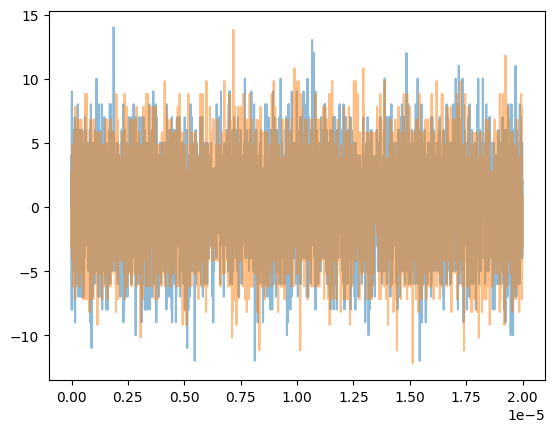

In [12]:
raw = my_runs[runs[0]][channels[0]]["AnaADC"][0]
print(raw)
# next_plot = False
# for i in range(len(my_runs[1][0][keys[0]])):
plt.plot(my_runs[1][0]["Sampling"]*np.arange(len(my_runs[runs[0]][channels[0]]["AnaADC"][0])),my_runs[runs[0]][channels[0]]["AnaADC"][0],label="RAW_WVF", drawstyle = "steps", alpha = 0.5)
plt.plot(my_runs[1][0]["Sampling"]*np.arange(len(my_runs[runs[0]][channels[0]]["AnaADC"][1])),my_runs[runs[0]][channels[0]]["AnaADC"][1],label="RAW_WVF", drawstyle = "steps", alpha = 0.5)
# plt.clf()
# plt.ioff()

In [16]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [18]:
x = my_runs[1][0]["Sampling"]*np.arange(len(my_runs[runs[0]][channels[0]]["AnaADC"][0]))
y = my_runs[1][0]["Sampling"]*np.arange(len(my_runs[runs[0]][channels[0]]["AnaADC"][0]))
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [35]:
my_runs[1][0]["Sampling"]

4e-09

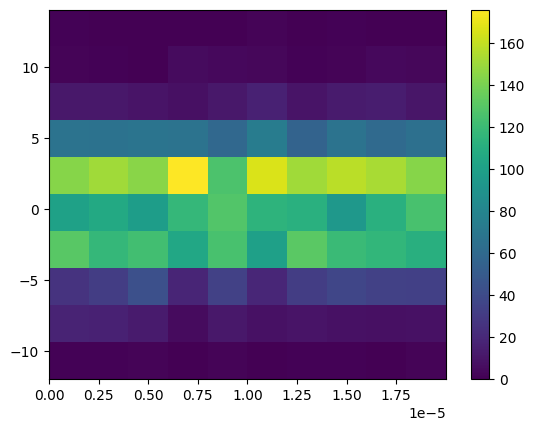

In [11]:
x = my_runs[1][0]["Sampling"]*np.arange(len(my_runs[1][0]["AnaADC"][0]))
y = my_runs[1][0]["AnaADC"][0]

len(y)
plt.hist2d(x,y)
plt.colorbar()

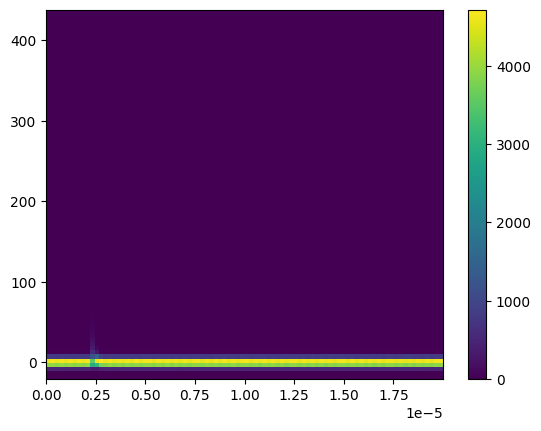

In [44]:
fig, ax = plt.subplots()
x = []
y = []
time = my_runs[1][0]["Sampling"]*np.arange(len(my_runs[1][0]["AnaADC"][0]))
for i in np.arange(len(my_runs[1][0]["AnaADC"][0])):
    for j in np.arange(len(my_runs[1][0]["AnaADC"][i])):
        x.append(time[j])
        y.append(my_runs[1][0]["AnaADC"][i][j])
    # sc = ax.scatter(x,y,c='C0', alpha=0.1,s=0.1)


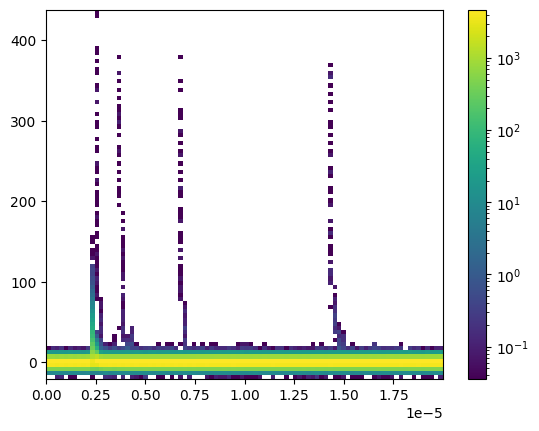

In [49]:
sc = plt.hist2d(x,y,density=True,bins=90, cmap = mpl.cm.viridis, norm=LogNorm())

plt.colorbar()
plt.show()


In [48]:
from matplotlib.colors import LogNorm

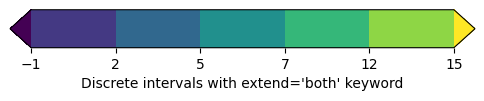

In [31]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

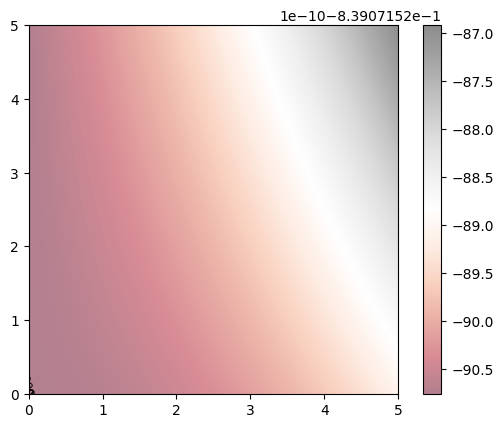

In [19]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

